## Chapter 10

### 7. In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let rij denote the correlation between the ith and jth observations, then the quantity 1 − rij is proportional to the squared Euclidean distance between the ith and jth observations. 

- On the USArrests data, show that this proportionality holds.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [11]:
usarr = pd.read_csv('USArrests.csv',index_col=0)
usarr

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [16]:
scaled_x  = StandardScaler().fit_transform(usarr) 
scaled_xt = scaled_x.T
eucl = distance.pdist(scaled_xt,metric='euclidean')
eucledian = distance.squareform(eucl)
eucledian = eucledian**2

In [23]:
corr  = np.corrcoef(scaled_x, rowvar=False)
prop = (1-corr)/ eucledian
print(prop)

[[ inf 0.01 0.01 0.01]
 [0.01  nan 0.01 0.01]
 [0.01 0.01  inf 0.01]
 [0.01 0.01 0.01  inf]]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


**8. In Section 10.2.3, a formula for calculating PVE was given in Equa- tion 10.8. We also saw that the PVE can be obtained using the sdev output of the prcomp() function.
On the USArrests data, calculate PVE in two ways:**

- (a) Using the sdev output of the prcomp() function, as was done in Section 10.2.3.
- (b) By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

These two approaches should give the same results.

Hint: You will only obtain the same results in (a) and (b) if the same data is used in both cases. For instance, if in (a) you performed prcomp() using centered and scaled variables, then you must center and scale the variables before applying Equation 10.3 in (b).

**(a)**

In [42]:
np.random.seed(1)
pca = PCA()
pca_tran = pca.fit_transform(usarr)
pve1      = pca.explained_variance_ratio_
print(pve1)

[9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]


**(b)**

In [43]:
pve2 = np.zeros(4)
for p in np.arange(0,4):
    pve2[p] = np.sum((pca.components_[p,:] @ scaled_xt )**2)/np.sum(scaled_xt**2)

In [44]:
pve2

array([0.2991552 , 0.27597155, 0.20889119, 0.21598206])

In [45]:
pve2 = np.zeros(4)
for i in range(0,4):
    pve2[i] = np.sum(np.matmul(pca.components_[i,:],scaled_xt)**2)/np.sum(scaled_xt**2)
print(pve2)  

[0.2991552  0.27597155 0.20889119 0.21598206]


**9. Consider the USArrests data. We will now perform hierarchical clustering on the states.**

**(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.**

In [48]:
hier = linkage(y= usarr, method='complete')

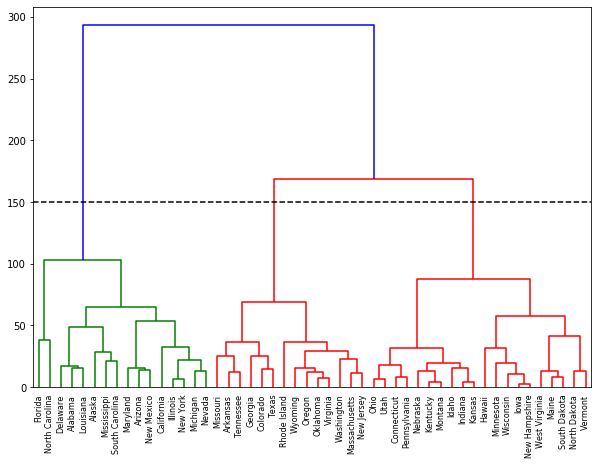

In [80]:
plt.figure(figsize=(10, 7))
dendrogram(hier,
            orientation='top',
            labels=usarr.index,
            distance_sort='descending',
            show_leaf_counts=True)
plt.axhline(y=150, c='k', ls='dashed')
plt.show()

**(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?**

In [74]:
df = pd.DataFrame({'Cluster':[r[0] for r in cut_tree(hier,3)] ,'State': usarr.index})
df = df.set_index('State')
df


,Cluster
State,
Alabama,0
Alaska,0
Arizona,0
Arkansas,1
California,0
Colorado,1
Connecticut,2
Delaware,0
Florida,0


In [64]:
cut_tree(hier,3)[10]

array([2])

**(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.**

In [77]:
link = linkage(scaled_x,method='complete')


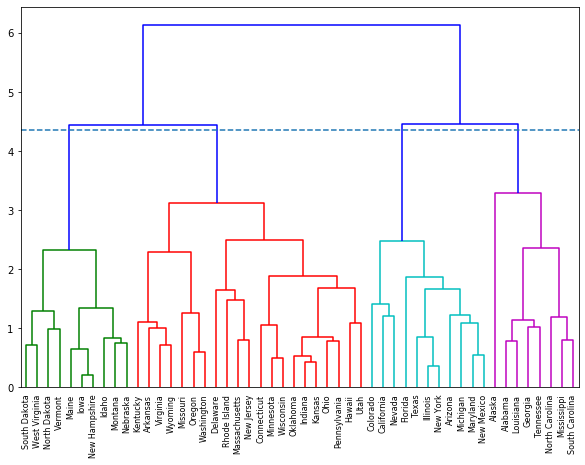

In [81]:
plt.figure(figsize=(10, 7))
dendrogram(link,
            orientation='top',
            labels=usarr.index,
            distance_sort='descending',
            show_leaf_counts=True)
plt.axhline(y=4.35,ls='dashed')
plt.show()

### 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.**

**(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.**

In [83]:
np.repeat(0,20)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
n=60
p=50
x = np.random.rand(n,p)
x

array([[0.79348467, 0.03587915, 0.19135888, ..., 0.32533133, 0.83894495,
        0.06282398],
       [0.10541975, 0.70178735, 0.51415827, ..., 0.23126429, 0.95601958,
        0.5646101 ],
       [0.2176053 , 0.24948205, 0.9595962 , ..., 0.60509913, 0.42092308,
        0.38615051],
       ...,
       [0.93687213, 0.43434875, 0.43101069, ..., 0.11938448, 0.45156667,
        0.01853394],
       [0.68812786, 0.01942263, 0.45527222, ..., 0.69162443, 0.1680197 ,
        0.34904873],
       [0.12208692, 0.28708703, 0.12909736, ..., 0.02619102, 0.95082799,
        0.56991764]])